In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk

In [2]:

def fetch_traffic_images(traffic_path):
    num_classes = 43
    traffic_images=[]
    labels=[]
    for label in range(num_classes):
        train_folders = os.path.join(traffic_path,'Train',str(label))
        imgs = os.listdir(train_folders)
        for img in imgs:
            image = Image.open(train_folders + '\\' +img)
            image = image.resize((30,30))
            image = np.array(image)
            traffic_images.append(image)
            labels.append(label)

    return traffic_images,labels

In [3]:
general_path= r'C:\Users\Dell\Desktop\Road sign recognition Project\DATA\Traffic'
X, Y =fetch_traffic_images(general_path)

In [4]:

Y=np.array(Y)
X=np.array(X)


In [5]:

file = open(os.path.join(general_path,'Classes.txt'))
classes = {}
for line in file:
    data = line.split('-')
    classes.update({data[0]: data[1]})


In [6]:
trainX,testX, trainY, testY = train_test_split(X,Y,test_size = 0.2, random_state=42, shuffle= True)

print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
#classes[str(Y[10000]+1)]
length = len(classes)
train_y = to_categorical(trainY,length)
test_y = to_categorical(testY,length)
train_y.shape
test_y.shape

(7842, 43)

In [8]:
pickle.dump(trainX,open(general_path+'\\'+'trainX.h5','wb'))
pickle.dump(testX,open(general_path+'\\'+'testX.h5','wb'))
pickle.dump(trainY,open(general_path+'\\'+'trainY.h5','wb'))
pickle.dump(testY,open(general_path+'\\'+'testY.h5','wb'))

In [19]:
def createModel(inputShape,outputSize):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(5,5),activation='relu', input_shape=inputShape))
    model.add(Conv2D(64, kernel_size=(5,5),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(32, kernel_size=(5,5),activation='relu'))
    model.add(Conv2D(32, kernel_size=(5,5),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(outputSize,activation='softmax'))

    return model

In [20]:
model = createModel(trainX.shape[1:],length)
model.summary()

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,963 (757.67 KB)

 Trainable params: 193,963 (757.67 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(trainX,train_y,epochs=16,validation_data=(testX,test_y), batch_size=32)

Epoch 1/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 69ms/step - accuracy: 0.2330 - loss: 3.2312 - val_accuracy: 0.7344 - val_loss: 0.9497
Epoch 2/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - accuracy: 0.6528 - loss: 1.1916 - val_accuracy: 0.8847 - val_loss: 0.4260
Epoch 3/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.7807 - loss: 0.7634 - val_accuracy: 0.9359 - val_loss: 0.2689
Epoch 4/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 75s 76ms/step - accuracy: 0.8428 - loss: 0.5418 - val_accuracy: 0.9434 - val_loss: 0.2164
Epoch 5/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 88s 90ms/step - accuracy: 0.8715 - loss: 0.4555 - val_accuracy: 0.9378 - val_loss: 0.2488
Epoch 6/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.8878 - loss: 0.3906 - val_accuracy: 0.9751 - val_loss: 0.1038
Epoch 7/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 103s 105ms/step - accuracy: 0.9085 - loss: 0.3245 - val_accuracy: 0.9818 - val_loss: 0.0699
Epoch 8/16
981/981 ━━━━━━━━━━━━━━━━━━━━ 103s 105ms/step - accuracy: 0.9126 - loss: 0.315

In [23]:
model.save(general_path +'\\model_traffic.h5')

In [24]:
pickle.dump(hist.history,open(general_path+'\\hist.h5','wb'))

In [25]:
trainX = pickle.load(open(general_path+'\\trainX.h5','rb'))
testX = pickle.load(open(general_path+'\\testX.h5','rb'))
trainY = pickle.load(open(general_path+'\\trainY.h5','rb'))
testY = pickle.load(open(general_path+'\\testY.h5','rb'))
history = pickle.load(open(general_path+'\\hist.h5','rb'))
model = load_model(general_path+'\\model_traffic.h5')

In [26]:
value = model.evaluate(testX,test_y)

print('Accuracy: ', round(value[1]*100,2), '%')

246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9874 - loss: 0.0434
Accuracy:  98.88 %


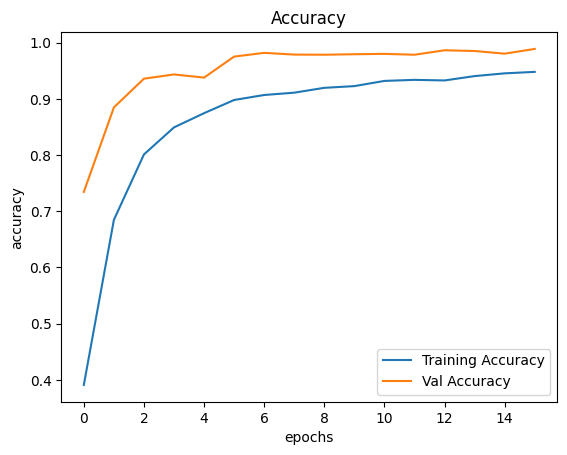

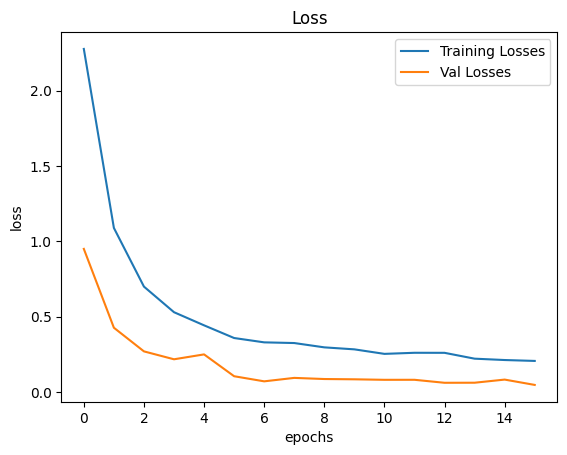

In [27]:
plt.figure(0)
plt.plot(history['accuracy'],label= 'Training Accuracy')
plt.plot(history['val_accuracy'],label= 'Val Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history['loss'],label= 'Training Losses')
plt.plot(history['val_loss'],label= 'Val Losses')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [28]:
samples = pd.read_csv(general_path+ '\\Test.csv')
imgs_path = samples['Path'].values
labels = samples['ClassId'].values
photos = []
for img in imgs_path:
    image = Image.open(general_path + '\\' +img)
    image = image.resize((30,30))
    image = np.array(image)
    photos.append(image)


In [29]:
data = np.array(photos)

prediction = model.predict(data)
pred_index = np.argmax(prediction,axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step


In [30]:
value = accuracy_score(labels,pred_index)*100
print('Accuracy: ', round(value,2), '%')

Accuracy:  96.14 %


In [31]:
def classify_image(path):
    image = Image.open(path)
    image = image.resize((30,30))
    image = np.array(image)
    plt.imshow(image)
    img = np.expand_dims(image, axis=0)
    vect_output = model.predict(img)
    indx = np.argmax(vect_output)
    definition =classes[str(indx+1)]

    print(definition)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Speed limit (30km/h) 



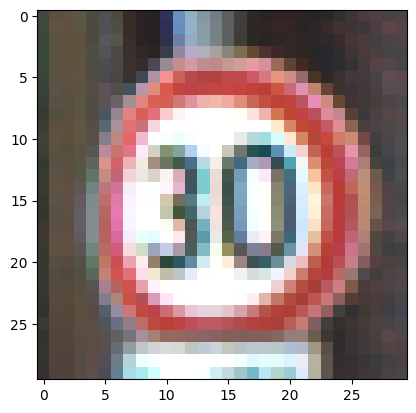

In [32]:
path = r'C:\Users\Dell\Desktop\Road sign recognition Project\DATA\Traffic\Test\00001.png'
classify_image(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


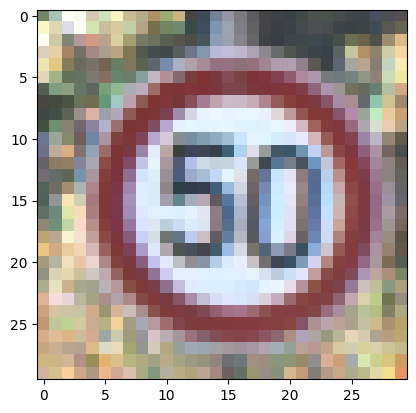

In [45]:

gui = tk.Tk()
gui.geometry('1200x800')
gui.title('Traffic sign recognition || By : EL HANNACH Walid')
gui.configure(background="#D3D3D3")
default_image = None

def classify_image2(path):
    image = Image.open(path)
    image = image.resize((30,30))
    image = np.array(image)
    plt.imshow(image)
    img = np.expand_dims(image, axis=0)
    vect_output = model.predict(img)
    indx = np.argmax(vect_output)
    definition =classes[str(indx+1)]

    traffic_class.configure(text=definition)

def addBtnClassify(path):
    btnClassify = tk.Button(gui, text='Recognize the road sign', command = lambda : classify_image(path))
    btnClassify.configure(background='#0F056B',foreground='white',font=('arial',12,'bold'))
    btnClassify.place(relx= 0.41,rely=0.7)

def uploadImage():
    file = filedialog.askopenfilename()
    default = Image.open(file)
    default = default.resize((360,360))
    default = ImageTk.PhotoImage(default)
    traffic_image.configure(image= default)
    traffic_image.image= default
    addBtnClassify(file)



btnUpload = tk.Button(gui, command= uploadImage ,text="Upload a traffic sign image")
btnUpload.configure(background='#ADD8E6',foreground='white',font=('arial',12,'bold'))

traffic_image = tk.Label(gui)
traffic_class = tk.Label(gui, background="#D3D3D3", foreground='#011110',font=('arial',12,'bold'))

# Path to your image
default = Image.open(r'C:\Users\Dell\Desktop\Road sign recognition Project\DATA\Traffic\img.jpg')
default = default.resize((360,360))
default = ImageTk.PhotoImage(default)
traffic_image.configure(image= default)
traffic_image.image= default

btnUpload.pack(pady=50)
traffic_image.pack()
traffic_class.pack()
gui.mainloop()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\customtkinter\windows\widgets\core_widget_classes\ctk_base_class.py:179: UserWarning: CTkLabel Warning: Given image is not CTkImage but <class 'PIL.ImageTk.PhotoImage'>. Image can not be scaled on HighDPI displays, use CTkImage instead.

  warnings.warn(f"{type(self).__name__} Warning: Given image is not CTkImage but {type(image)}. Image can not be scaled on HighDPI displays, use CTkImage instead.\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


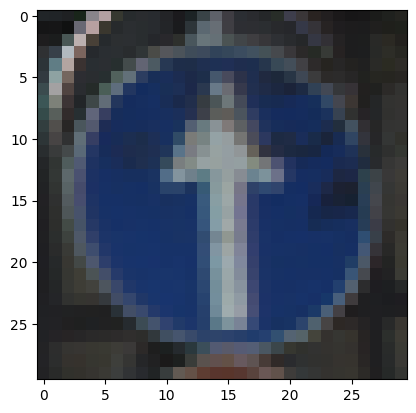

In [1]:
# Complete project
# Created by: EL HANNACH Walid

import os
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from sklearn.metrics import accuracy_score
import customtkinter as ctk
from tkinter import filedialog

general_path = r'C:\Users\Dell\Desktop\Road sign recognition Project\DATA\Traffic'

file = open(os.path.join(general_path, 'Classes.txt'))
classes = {}
for line in file:
    data = line.split('-')
    classes.update({data[0]: data[1]})

trainX = pickle.load(open(general_path + '\\trainX.h5', 'rb'))
testX = pickle.load(open(general_path + '\\testX.h5', 'rb'))
trainY = pickle.load(open(general_path + '\\trainY.h5', 'rb'))
testY = pickle.load(open(general_path + '\\testY.h5', 'rb'))
history = pickle.load(open(general_path + '\\hist.h5', 'rb'))
model = load_model(general_path + '\\model_traffic.h5')

# Initialize the customtkinter GUI
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

gui = ctk.CTk()
gui.geometry('1200x800')
gui.title('Traffic Sign Recognition || By: EL HANNACH Walid')

default_image = None

def classify_image2(path):
    image = Image.open(path)
    image = image.resize((30, 30))
    image = np.array(image)
    plt.imshow(image)
    img = np.expand_dims(image, axis=0)
    vect_output = model.predict(img)
    indx = np.argmax(vect_output)
    definition = classes[str(indx + 1)]

    traffic_class.configure(text=definition)

def addBtnClassify(path):
    btnClassify = ctk.CTkButton(gui, text='Recognize the Road Sign', command=lambda: classify_image2(path), 
                                width=250, height=50, font=('Arial', 16, 'bold'))
    btnClassify.place(relx=0.40, rely=0.7)

def uploadImage():
    file = filedialog.askopenfilename()
    default = Image.open(file)
    default = default.resize((360, 360))
    default = ImageTk.PhotoImage(default)
    traffic_image.configure(image=default)
    traffic_image.image = default
    addBtnClassify(file)

btnUpload = ctk.CTkButton(gui, command=uploadImage, text="Upload a Traffic Sign Image", 
                          width=250, height=50, font=('Arial', 16, 'bold'))

traffic_image = ctk.CTkLabel(gui, text="")
traffic_class = ctk.CTkLabel(gui, text="", text_color='white', font=('Arial', 18, 'bold'))

# Path to your image
default = Image.open(r'C:\Users\Dell\Desktop\Road sign recognition Project\DATA\Traffic\img.jpg')
default = default.resize((360, 360))
default = ImageTk.PhotoImage(default)
traffic_image.configure(image=default)
traffic_image.image = default

# Add created by and internship information
info_frame = ctk.CTkFrame(gui)
info_frame.place(relx=0.05, rely=0.02, anchor='nw')

created_by_label = ctk.CTkLabel(info_frame, text="Developed by: EL HANNACH Walid", 
                                text_color='white', font=('Arial', 14, 'bold'))

created_by_label.pack()

btnUpload.pack(pady=50)
traffic_image.pack()
traffic_class.pack(pady=50)

gui.mainloop()
